#MobileNet CNN Transfer Learning - Projet M1 - Voiture Autonome

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


###Vérification de nos données

In [ ]:
import numpy as np
import random
import os
import cv2 as cv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential, load_model
from keras.layers import Conv2D, Dense, Flatten, Rescaling, AveragePooling2D, Dropout

DATADIR = "/content/drive/MyDrive/ProjetM1IA/DataSetProjetM1"
CATEGORIES = ["WithoutSign_Training","PanneauInterdit_Training" , "PanneauStop_Training", "PanneauLeft_Training", "PanneauRight_Training","Panneau30_Training","Panneau50_Training","Panneau80_Training"]
CLASS_NAMES = ["No Sign","Forbidden Sign","Stop Sign","Turn Left Sign", "Turn Right Sign","30km/h Sign","50km/h Sign","80km/h Sign"]

###Construction des données d'entrainement

In [ ]:
training_data = []

def create_training_data():
    for category in CATEGORIES: 
      path = os.path.join(DATADIR, category) #Path to differents sign
      class_num = CATEGORIES.index(category) #Associate number to type of sign (0 = Forbidden Sign , 1 = Stop Sign , 2 = Turn Left Sign)
      for img in os.listdir(path):
        try : 
          img_array = cv.imread(os.path.join(path,img)) #We pass img to gray to pass on 2D object
          new_array = cv.resize(img_array, (32,32)) #We resize each img to 32x32
          image = np.array(new_array)
          training_data.append([image,class_num]) #We had this image with his number 
        except Exception as e:
          pass

create_training_data()

In [ ]:
training_image = []
training_labels = []
for i in range(len(training_data)):
  training_image.append(training_data[i][0])
  label = np.zeros(8)
  label[training_data[i][1]] = 1.0
  training_labels.append(label)
training_image = np.array(training_image)
training_image = training_image/255
training_labels = np.array(training_labels)
print("Images train shape : " + str(training_image.shape))
print("Labels train shape : " + str(training_labels.shape))

Images train shape : (10376, 32, 32, 3)
Labels train shape : (10376, 8)


###Construction des données de test

In [ ]:
testing_data = []
DATADIR = "/content/drive/MyDrive/ProjetM1IA/DataSetProjetM1"
CATEGORIES_TEST = ["WithoutSign_Testing","PanneauInterdit_Testing" , "PanneauStop_Testing", "PanneauLeft_Testing", "PanneauRight_Testing","Panneau30_Testing","Panneau50_Testing","Panneau80_Testing"]

def create_testing_data():
  for category in CATEGORIES_TEST: 
      path = os.path.join(DATADIR, category) #Path to differents sign
      class_num = CATEGORIES_TEST.index(category) #Associate number to type of sign (0 = Forbidden Sign , 1 = Stop Sign , 2 = Turn Left Sign)
      for img in os.listdir(path):
        try : 
          img_array = cv.imread(os.path.join(path,img)) #We pass img to gray to pass on 2D object
          new_array = cv.resize(img_array, (32,32)) #We resize each img to 32x32
          image = np.array(new_array)
          testing_data.append([image,class_num]) #We had this image with his number 
        except Exception as e:
          pass

create_testing_data()

In [ ]:
testing_image = []
testing_labels = []
for i in range(len(testing_data)):
  testing_image.append(testing_data[i][0])
  label = np.zeros(8)
  label[testing_data[i][1]] = 1.0
  testing_labels.append(label)
testing_image = np.array(testing_image)
testing_image = testing_image/255
testing_labels = np.array(testing_labels)
print("Images train shape : " + str(testing_image.shape))
print("Labels train shape : " + str(testing_labels.shape))

Images train shape : (4103, 32, 32, 3)
Labels train shape : (4103, 8)


###Construction des données de validation

In [ ]:
validation_data = []

DATADIR = "/content/drive/MyDrive/ProjetM1IA/DataSetProjetM1"
CATEGORIES_VALIDATION = ["WithoutSign_Validation","PanneauInterdit_Validation", "PanneauStop_Validation","PanneauLeft_Validation","PanneauRight_Validation","Panneau30_Validation","Panneau50_Validation","Panneau80_Validation"]

def create_validation_data():
  for category in CATEGORIES_VALIDATION: 
      path = os.path.join(DATADIR, category) #Path to differents sign
      class_num = CATEGORIES_VALIDATION.index(category) #Associate number to type of sign (0 = Forbidden Sign , 1 = Stop Sign , 2 = Turn Left Sign)
      for img in os.listdir(path):
        try : 
          img_array = cv.imread(os.path.join(path,img)) #We pass img to gray to pass on 2D object
          new_array = cv.resize(img_array, (32,32)) #We resize each img to 32x32
          image = np.array(new_array)
          validation_data.append([image,class_num]) #We had this image with his number 
        except Exception as e:
          pass

create_validation_data()

In [ ]:
validation_image = []
validation_labels = []
for i in range(len(validation_data)):
  validation_image.append(validation_data[i][0])
  label = np.zeros(8)
  label[validation_data[i][1]] = 1.0
  validation_labels.append(label)
validation_image = np.array(validation_image)
validation_image = validation_image/255
validation_labels = np.array(validation_labels)
print("Images train shape : " + str(validation_image.shape))
print("Labels train shape : " + str(validation_labels.shape))

Images train shape : (2866, 32, 32, 3)
Labels train shape : (2866, 8)


In [ ]:
X_train = training_image.astype(np.float32)
y_train = training_labels.astype(np.float32)
X_test = testing_image.astype(np.float32)
y_test = testing_labels.astype(np.float32)
X_val = validation_image.astype(np.float32)
y_val = validation_labels.astype(np.float32)
print("X_train shape : " + str(X_train.shape))
print("y_train shape : " + str(y_train.shape))
print("X_val shape : " + str(X_val.shape))
print("y_val shape : " + str(y_val.shape))
print("X_test shape : " + str(X_test.shape))
print("y_test shape : " + str(y_test.shape))

X_train shape : (10376, 32, 32, 3)
y_train shape : (10376, 8)
X_val shape : (2866, 32, 32, 3)
y_val shape : (2866, 8)
X_test shape : (4103, 32, 32, 3)
y_test shape : (4103, 8)


###Entrainement du modèle MobileNet

In [ ]:
from tensorflow import keras
from keras import layers
import tensorflow as tf
import cv2

In [ ]:
data_augmentation = keras.Sequential(

    [

        layers.RandomFlip("horizontal"),

        layers.RandomRotation(0.1),

        layers.RandomZoom(0.2),

    ]

)

In [ ]:
base_model = tf.keras.applications.MobileNet(weights="imagenet", include_top=False, input_shape=(32,32,3))
base_model.trainable=True
model = tf.keras.Sequential()
model.add(data_augmentation)
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(units=120, activation='relu'))
model.add(layers.Dense(units=8, activation='softmax'))

17235968/17225924 [==============================] - 1s 0us/step


In [ ]:
# Compilation of the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
325/325 [==============================] - 25s 33ms/step - loss: 0.8270 - accuracy: 0.6825 - val_loss: 0.4290 - val_accuracy: 0.8402
Epoch 2/20
325/325 [==============================] - 10s 30ms/step - loss: 0.4333 - accuracy: 0.8400 - val_loss: 0.2823 - val_accuracy: 0.8985
Epoch 3/20
325/325 [==============================] - 9s 28ms/step - loss: 0.2989 - accuracy: 0.8970 - val_loss: 0.1478 - val_accuracy: 0.9571
Epoch 4/20
325/325 [==============================] - 9s 28ms/step - loss: 0.2680 - accuracy: 0.9064 - val_loss: 0.1894 - val_accuracy: 0.9459
Epoch 5/20
325/325 [==============================] - 9s 28ms/step - loss: 0.2127 - accuracy: 0.9334 - val_loss: 0.0524 - val_accuracy: 0.9839
Epoch 6/20
325/325 [==============================] - 9s 28ms/step - loss: 0.1645 - accuracy: 0.9456 - val_loss: 0.1188 - val_accuracy: 0.9491
Epoch 7/20
325/325 [==============================] - 10s 30ms/step - loss: 0.1652 - accuracy: 0.9473 - val_loss: 0.0658 - val_accuracy: 0.9

###Evaluation du modèle

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

129/129 - 1s - loss: 0.1763 - accuracy: 0.9664 - 1s/epoch - 11ms/step

Test accuracy: 0.9663660526275635

Test loss: 0.17634828388690948


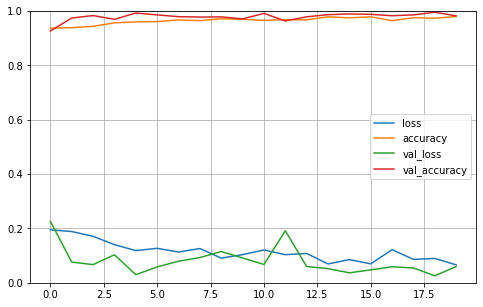

In [ ]:
import pandas as pd
pd.DataFrame( history.history).plot(figsize =( 8, 5)) 
plt.grid(True) 
plt.gca().set_ylim( 0, 1) 
plt.show()

###Sauvegarde du modèle

In [ ]:
model.save('/content/drive/MyDrive/ProjetM1IA/keras_modelv4/')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/ProjetM1IA/keras_modelv4/assets
